In [1]:
from data_utils import get_prices_daily, create_prices_df, read_all_candles
import matplotlib.pyplot as plt
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

In [2]:
df_daily = get_prices_daily("trainTimeSeries/trainTimeSeries/TrainCandles")

100%|██████████| 96/96 [00:00<00:00, 4225.02it/s]


In [2]:
candles = read_all_candles("trainTimeSeries/trainTimeSeries/TrainCandles")

100%|██████████| 96/96 [00:01<00:00, 63.31it/s]


In [3]:
df = create_prices_df(candles, exact=False, )

100%|██████████| 96/96 [00:00<00:00, 2705.46it/s]


In [4]:
df.head()

,date,ZVQ_close,NCT_close,YAX_close,OOS_close,GFJ_close,FIR_close,USX_close,FSK_close,TMF_close,...,AZG_close,OJG_close,WWT_close,BOT_close,TXR_close,RAT_close,DIG_close,SRI_close,PHI_close,RWJ_close
0,2018-12-19 01:00:00,519.23,NaN,NaN,NaN,NaN,NaN,NaN,154.69,NaN,...,129.87,NaN,129.98,NaN,NaN,140.36,NaN,92.19,NaN,NaN
1,2018-12-19 02:00:00,519.63,NaN,NaN,NaN,NaN,NaN,NaN,155.01,NaN,...,129.95,NaN,130.02,NaN,NaN,140.55,NaN,92.11,NaN,NaN
2,2018-12-19 03:00:00,519.95,NaN,NaN,NaN,NaN,NaN,NaN,155.08,NaN,...,130.07,NaN,130.10,NaN,NaN,140.51,NaN,92.12,NaN,NaN
3,2018-12-19 04:00:00,520.09,NaN,NaN,NaN,NaN,NaN,NaN,155.16,NaN,...,130.26,NaN,130.50,NaN,NaN,140.57,NaN,92.18,NaN,NaN
4,2018-12-19 05:00:00,520.06,NaN,NaN,NaN,NaN,NaN,NaN,155.23,NaN,...,130.07,NaN,130.28,NaN,NaN,140.50,NaN,92.07,NaN,NaN


In [4]:
df_daily.head()

,ZVQ_close,NCT_close,YAX_close,OOS_close,GFJ_close,FIR_close,USX_close,FSK_close,TMF_close,TDD_close,...,AZG_close,OJG_close,WWT_close,BOT_close,TXR_close,RAT_close,DIG_close,SRI_close,PHI_close,RWJ_close
date,,,,,,,,,,,,,,,,,,,,,
2018-12-19,531.91,119.05,NaN,NaN,NaN,121.61,NaN,154.46,NaN,116.14,...,130.83,NaN,130.76,138.44,142.04,140.28,NaN,92.24,110.98,NaN
2018-12-20,531.91,119.47,NaN,NaN,NaN,121.61,NaN,156.63,NaN,117.09,...,131.67,NaN,132.69,140.03,141.87,140.28,NaN,92.18,110.98,NaN
2018-12-21,NaN,NaN,NaN,NaN,NaN,120.94,NaN,154.53,NaN,NaN,...,131.62,NaN,133.27,NaN,NaN,140.28,NaN,NaN,NaN,NaN
2018-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-23,NaN,119.47,NaN,NaN,NaN,121.37,NaN,155.15,NaN,NaN,...,NaN,NaN,133.30,140.69,141.84,NaN,NaN,NaN,110.98,NaN


In [5]:
df_daily.isna().sum()/df_daily.shape[0]

ZVQ_close    0.201097
NCT_close    0.261426
YAX_close    0.760512
OOS_close    0.274223
GFJ_close    0.372943
               ...   
RAT_close    0.186472
DIG_close    0.477148
SRI_close    0.212066
PHI_close    0.281536
RWJ_close    0.301645
Length: 96, dtype: float64

(array([51., 17.,  8.,  3.,  8.,  6.,  0.,  2.,  0.,  1.]),
 array([ 81. , 123.1, 165.2, 207.3, 249.4, 291.5, 333.6, 375.7, 417.8,
        459.9, 502. ]),
 <BarContainer object of 10 artists>)

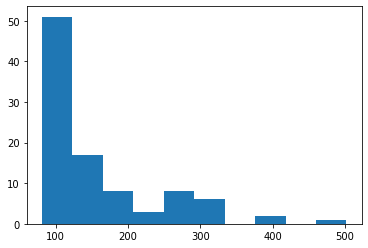

In [6]:
plt.hist(df_daily.isna().sum().tolist())

(array([51., 17.,  8.,  3.,  8.,  6.,  0.,  2.,  0.,  1.]),
 array([0.14808044, 0.2250457 , 0.30201097, 0.37897623, 0.4559415 ,
        0.53290676, 0.60987203, 0.68683729, 0.76380256, 0.84076782,
        0.91773309]),
 <BarContainer object of 10 artists>)

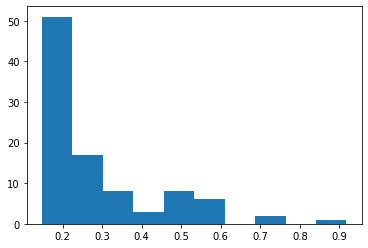

In [7]:
plt.hist(df_daily.isna().sum()/df_daily.shape[0])

In [8]:
52*2 / 52*7

14.0

In [9]:
df_daily.fillna(method="ffill", inplace=True)

(array([68.,  4.,  5.,  2.,  8.,  5.,  1.,  2.,  0.,  1.]),
 array([0.        , 0.09031079, 0.18062157, 0.27093236, 0.36124314,
        0.45155393, 0.54186472, 0.6321755 , 0.72248629, 0.81279707,
        0.90310786]),
 <BarContainer object of 10 artists>)

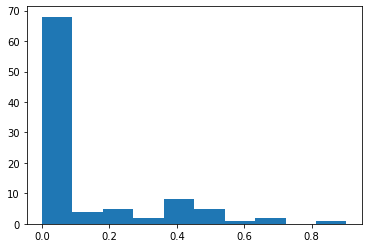

In [10]:
plt.hist(df_daily.isna().sum()/df_daily.shape[0])

In [11]:
df_daily_filter = df_daily.loc[:, (df_daily.isna().sum()/df_daily.shape[0]) < 0.2]

In [12]:
df_daily_filter.isna().sum().sum()

610

In [30]:
mean_historical_return(df_daily_filter).mean()


0.09415210570417909

In [31]:
mean_historical_return(df_daily).mean()


0.10349743943992394

In [3]:
from portfolio_optimization import get_portfolio_weights

In [5]:
weights = get_portfolio_weights(df_daily, clean=True, req_return=0.005)

In [6]:
from general_utils import get_submission_markowitz


In [8]:
assets = [asset.replace("_close", "") for asset in df_daily.columns]

In [15]:
import pandas as pd

In [19]:
def _fix_weights(weights):
    suma_weights = sum(weights.values())
    if suma_weights < 1.0:
        #print(sum(weights.values()))
        max_weight_asset = list(sorted(weights, key=weights.get, reverse=True))[0]
        falta = 1 - suma_weights
        weights[max_weight_asset] += falta
        #print(sum(weights.values()))
        assert sum(weights.values()) == 1.0
        return weights
    elif suma_weights > 1.0:
        max_weight_asset = list(sorted(weights, key=weights.get, reverse=True))[0]
        sobra = suma_weights - 1
        weights[max_weight_asset] -= sobra
        assert sum(weights.values()) == 1.0
        assert all([v > 0 for v in weights.values])
    return weights

In [20]:
w = _fix_weights(weights)

In [12]:
sum(weights.values())

1.0

In [22]:
any([v<0 for v in w.values()])

False

In [23]:
def get_submission_markowitz(weights, assets):
    weights = _fix_weights(weights)
    subm_plantilla = pd.read_csv("./submission/submission.csv")
    date = subm_plantilla["eod_ts"]
    cols = {
        f"allo_{asset}": [weights[f"{asset}_close"]] * len(date) for asset in assets
    }
    return pd.DataFrame({"eod_ts": date, **cols})

In [13]:
def _fix_weights(weights):
    suma_weights = sum(weights.values())
    if suma_weights < 1.0:
        #print(sum(weights.values()))
        max_weight_asset = list(sorted(weights, key=weights.get, reverse=True))[0]
        falta = 1 - suma_weights
        weights[max_weight_asset] += falta
        #print(sum(weights.values()))
        assert sum(weights.values()) == 1.0
        return weights
    elif suma_weights > 1.0:
        max_weight_asset = list(sorted(weights, key=weights.get, reverse=True))[0]
        sobra = suma_weights - 1
        weights[max_weight_asset] -= sobra
        assert sum(weights.values()) == 1.0
        assert all([v > 0 for v in weights.values()])
    return weights


def get_submission_markowitz(weights, assets):
    weights = _fix_weights(weights)
    subm_plantilla = pd.read_csv("./submission/submission.csv")
    date = subm_plantilla["eod_ts"]
    cols = {
        f"allo_{asset}": [weights[f"{asset}_close"]] * len(date) for asset in assets
    }
    return pd.DataFrame({"eod_ts": date, **cols})

In [16]:
submission = get_submission_markowitz(weights, assets)

In [20]:
submission.sum(axis=1).sum()

2229.0

In [21]:
submission.shape

(2229, 97)

In [18]:
submission.dtypes

eod_ts       object
allo_ZVQ    float64
allo_NCT    float64
allo_YAX    float64
allo_OOS    float64
             ...   
allo_RAT    float64
allo_DIG    float64
allo_SRI    float64
allo_PHI    float64
allo_RWJ    float64
Length: 97, dtype: object

In [19]:
submission.iloc[:, 1:].where(submission.iloc[:,1:] < 0).sum(axis=1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2224    0.0
2225    0.0
2226    0.0
2227    0.0
2228    0.0
Length: 2229, dtype: float64

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


In [22]:
submission.to_csv("submission_0102_2.csv", header=True, index=False, encoding="utf-8")

In [ ]:
def get_portfolio_weights(df, clean=False):
    """
    Returns the portfolio weights, following Markowitz's
    Modern Portfolio Theory to maximize sharpe ratio.
    """
    mu = mean_historical_return(df)
    S = CovarianceShrinkage(df).ledoit_wolf()
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    if clean:
        weights = ef.clean_weights()
    #weights = _fix_weights(weights)
    return weights


In [ ]:
weights = get_portfolio_weights(df_daily_filter, clean=True)

In [ ]:
sum(weights.values())